In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


2025-09-09 09:34:42.840957: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-09 09:34:42.950363: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-09 09:34:43.110079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757388883.286565    7844 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757388883.342228    7844 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757388883.626774    7844 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [ ]:
# Load MNIST dataset
(mnist_trainX, mnist_trainY), (mnist_testX, mnist_testY) = mnist.load_data()

# Print shapes for debugging
print(f"MNIST trainX shape: {mnist_trainX.shape}, trainY shape: {mnist_trainY.shape}")

# Preprocess MNIST: Normalize to [0,1] and ensure float32
mnist_trainX = mnist_trainX.astype('float32') / 255.0
mnist_testX = mnist_testX.astype('float32') / 255.0
    
# Convert labels to one-hot encoding (for 10 classes: digits 0-9)
mnist_trainY = to_categorical(mnist_trainY, 10)
mnist_testY = to_categorical(mnist_testY, 10)


MNIST trainX shape: (60000, 28, 28), trainY shape: (60000,)


In [3]:
inputs = Input((28, 28))
x = Flatten()(inputs) #--- 2d vector(image) input have to be flatten
x = Dense(256, activation = 'relu')(x)
outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

2025-09-09 09:34:51.840253: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
# Train the model
history = model.fit(
    mnist_trainX, mnist_trainY, 
    validation_split=0.2, 
    epochs=10, 
    batch_size=32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9262 - loss: 0.2546 - val_accuracy: 0.9580 - val_loss: 0.1416
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9699 - loss: 0.1036 - val_accuracy: 0.9636 - val_loss: 0.1187
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9791 - loss: 0.0688 - val_accuracy: 0.9711 - val_loss: 0.0942
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9853 - loss: 0.0476 - val_accuracy: 0.9741 - val_loss: 0.0895
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9898 - loss: 0.0336 - val_accuracy: 0.9759 - val_loss: 0.0821
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9745 - val_loss: 0.0887
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9762 - val_loss: 0.0927
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9951 -

In [5]:
# Calculate accuracy on MNIST test set
mnist_predY = model.predict(mnist_testX)
mnist_testY_labels = np.argmax(mnist_testY, axis=1)
mnist_predY_labels = np.argmax(mnist_predY, axis=1)

acc = accuracy_score(mnist_testY_labels, mnist_predY_labels)
print(f"Accuracy on MNIST test set: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy on MNIST test set: 0.9779


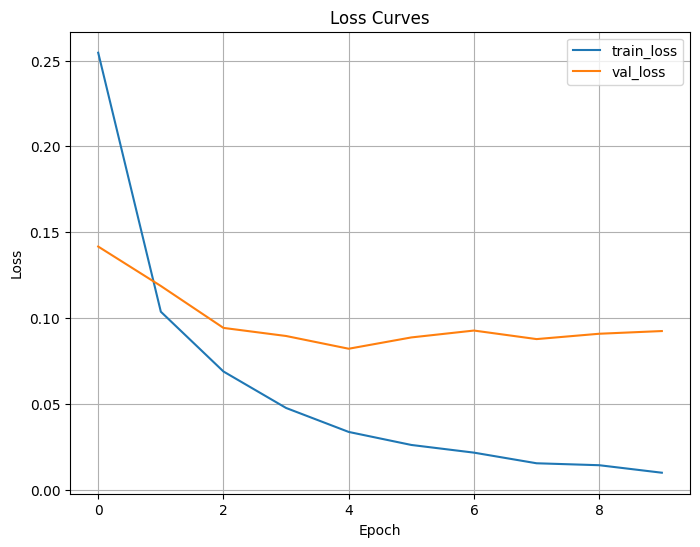

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
    

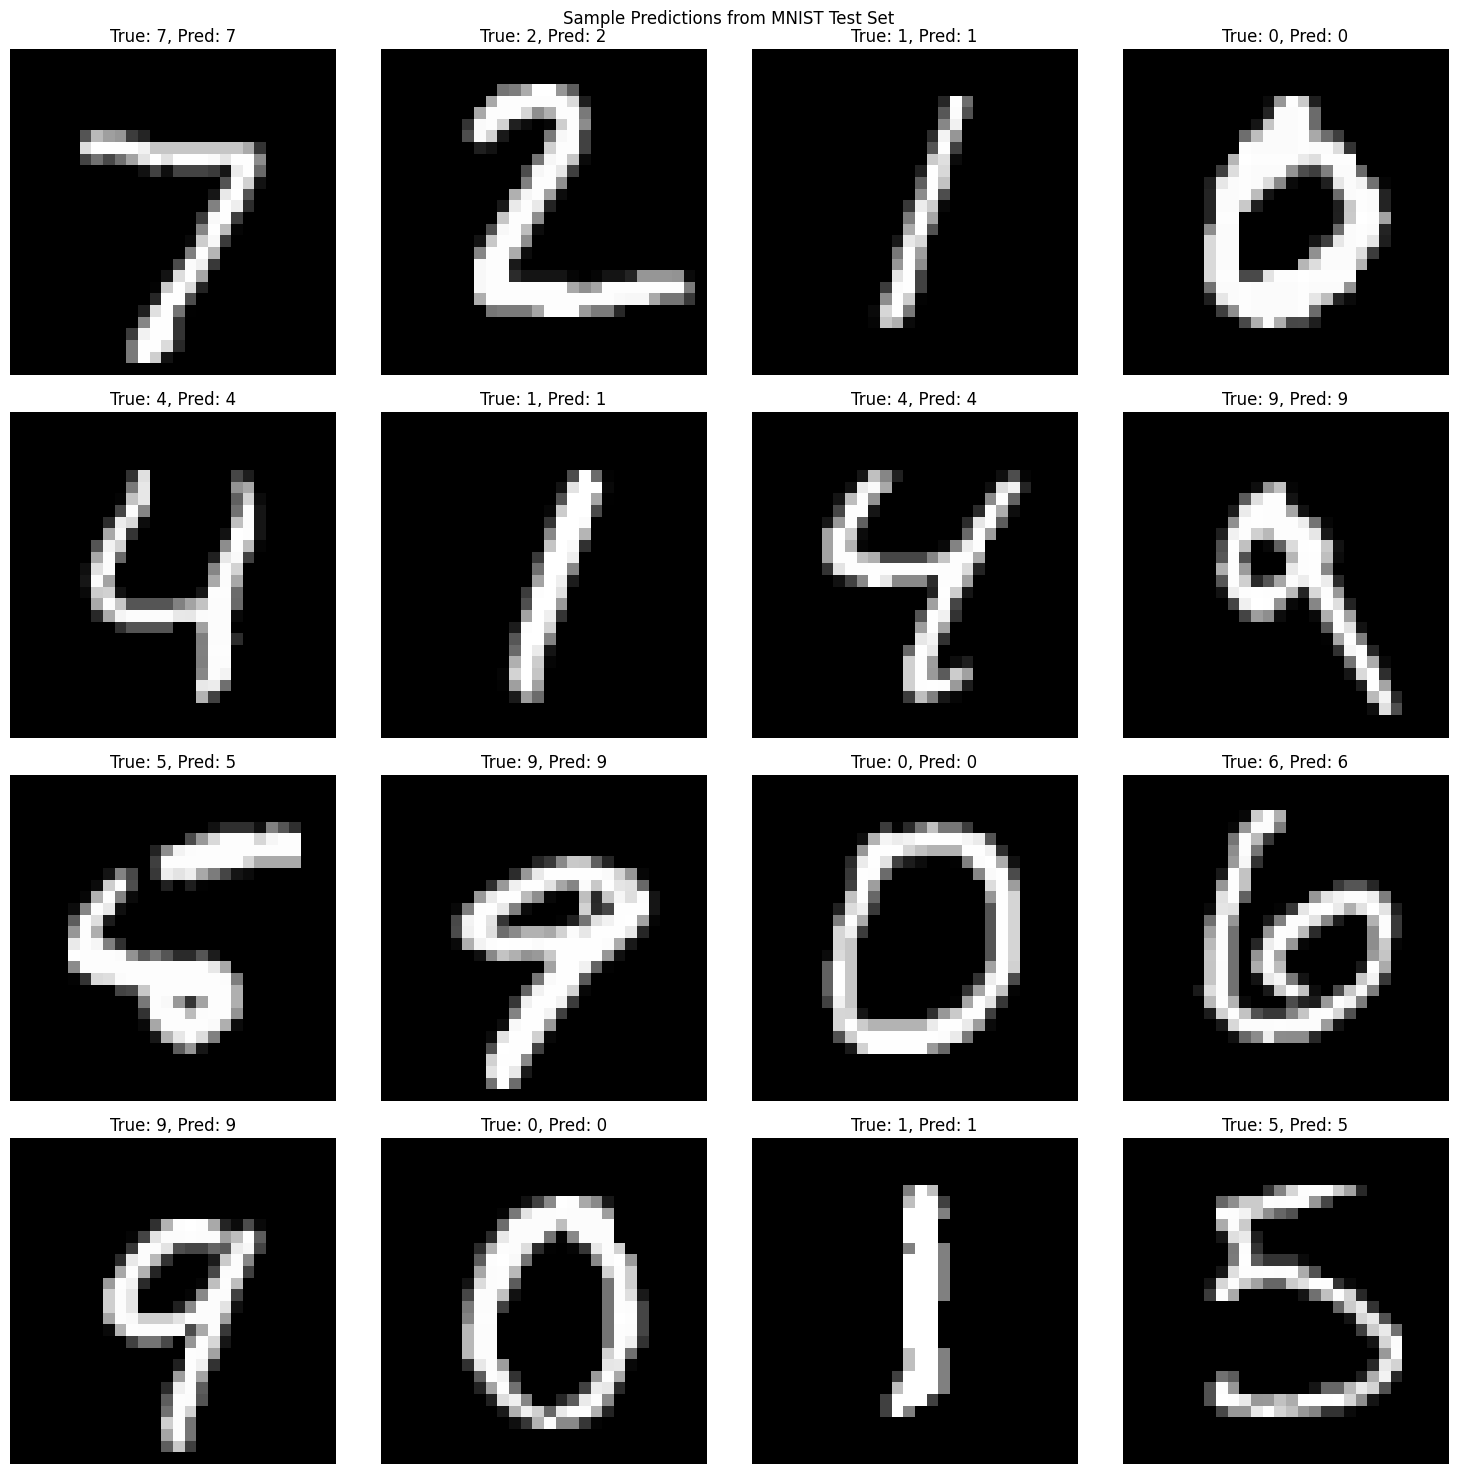

In [9]:
# Plot sample predictions from custom test set
plt.figure(figsize=(15, 15))
num_samples, rows, cols = 16, 4, 4
for i in range(min(num_samples, len(mnist_testX))):
    plt.subplot(rows, cols, i+1)
    plt.axis('off')
    plt.imshow(mnist_testX[i], cmap="gray")
    plt.title(f'True: {mnist_testY_labels[i]}, Pred: {mnist_predY_labels[i]}')
plt.suptitle(f'Sample Predictions from MNIST Test Set')
plt.tight_layout()
plt.show()